In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from src.preprocess import CompositePipeline, OnehotEncoder, StdNormalization, Binner
from src.data import Dataset, split_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from src.train import TrainingPipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv("../dataset/germancredit.csv")

In [3]:
cat_cols = ['status.of.existing.checking.account',
       'credit.history', 'purpose', 
       'savings.account.and.bonds', 'present.employment.since',
       'personal.status.and.sex', 'other.debtors.or.guarantors',
       'present.residence.since', 'property', 
       'other.installment.plans', 'housing',
       'job',
       'telephone',
       'foreign.worker',
        'installment.rate.in.percentage.of.disposable.income',
        'number.of.existing.credits.at.this.bank', 
        'number.of.people.being.liable.to.provide.maintenance.for', 
           
]


numeric_cols = [
    'duration.in.month',
    'credit.amount',
    'age.in.years',
]
cols_num_beans = {
    "age.in.years":10, 
    "duration.in.month":5,
    "credit.amount":15
    
}

In [4]:
pipeline = CompositePipeline([
    Binner(numeric_cols, cols_num_beans),
    OnehotEncoder(data.columns[:-1])
])

In [5]:
preprocess_args = {
    "func":pipeline,
    "test_size":0.2
}
feature_selection_args = {
    "fraction": 0.6
}
train_args = {
    
}
evaluation_args = {
    
}

In [6]:
training_pipeline = TrainingPipeline(data, preprocess_args, feature_selection_args, train_args, evaluation_args)

In [7]:
print(training_pipeline.evaluate())

              precision    recall  f1-score   support

         bad       0.60      0.62      0.61        60
        good       0.83      0.82      0.83       140

    accuracy                           0.76       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.76      0.76       200



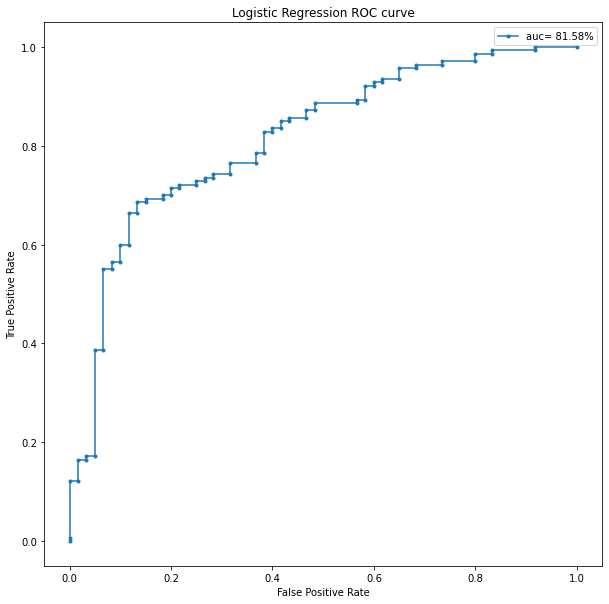

In [8]:
training_pipeline.show_performance()

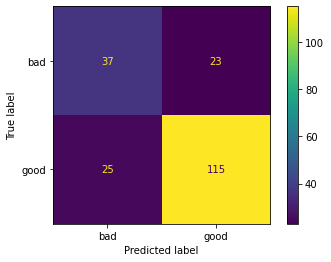

In [9]:
plot_confusion_matrix(training_pipeline.model, training_pipeline.test_ds.X, training_pipeline.test_ds.y)

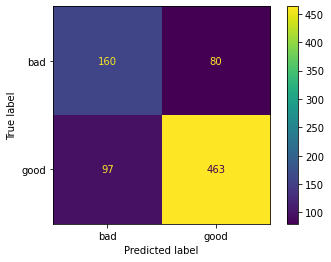

In [10]:
plot_confusion_matrix(training_pipeline.model, training_pipeline.train_ds.X, training_pipeline.train_ds.y)

In [17]:
accuracy_score(training_pipeline.test_ds.y, training_pipeline.model.predict(training_pipeline.test_ds.X))

0.76

In [18]:
accuracy_score(training_pipeline.train_ds.y, training_pipeline.model.predict(training_pipeline.train_ds.X))

0.77875